In [82]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [83]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
   

In [84]:
df = pd.read_excel('ozon_data.xlsx')
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

X = df.drop(columns=['Decmc']) 
y = df['Decmc']

In [85]:
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=23)

In [87]:
np.shape(X_train)

(290, 6)

In [88]:
cat_model = CatBoostRegressor(verbose=0)

In [89]:
param_grid = {
    'iterations': [100, 200, 500],         # İterasyon sayısı (veya ağaç sayısı)
    'learning_rate': [0.01, 0.05, 0.2],     # Öğrenme hızı
    'depth': [4, 6, 10],                  # Ağacın derinliği
    'l2_leaf_reg': [3, 5],            # L2 regülarizasyon terimi
    'bagging_temperature': [0.5, 1]   # Subsample oranı için sıcaklık kontrolü
}



In [90]:
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000012F5A305280>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0.5, 1], 'depth': [4, 6, 10],
                         'iterations': [100, 200, 500], 'l2_leaf_reg': [3, 5],
                         'learning_rate': [0.01, 0.05, 0.2]},
             scoring='neg_mean_squared_error')

In [91]:
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

{'bagging_temperature': 0.5, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.2}


In [92]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [93]:
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

c:\Users\GOKTUG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\GOKTUG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [94]:
print("Eğitim verileri için metrikler")
print(f'Eğitim RMSE: {rmse_train}')
print(f'Eğitim MAPE: {mape_train}')
print(f'Test MSE: {mse_test}')
print(f'Eğitim R^2: {r2_train}')
print('-----------------------------')
print("Test verileri için metrikler")
print(f'Test RMSE: {rmse_test}')
print(f'Test MAPE: {mape_test}')
print(f'Test MSE: {mse_test}')
print(f'Test R^2: {r2_test}')

Eğitim verileri için metrikler
Eğitim RMSE: 0.3645021638765932
Eğitim MAPE: 5.434903434351752
Test MSE: 0.17373339838790638
Eğitim R^2: 0.9971807808529353
-----------------------------
Test verileri için metrikler
Test RMSE: 0.4168133855670981
Test MAPE: 4.913815279763554
Test MSE: 0.17373339838790638
Test R^2: 0.9958459886282982


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

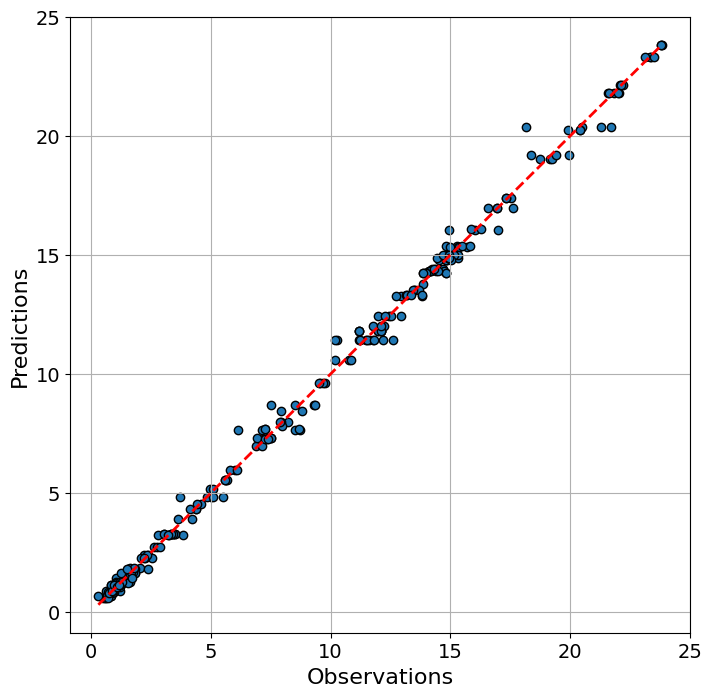

In [67]:
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel('Observations', fontsize=16) 
plt.ylabel('Predictions', fontsize=16) 
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

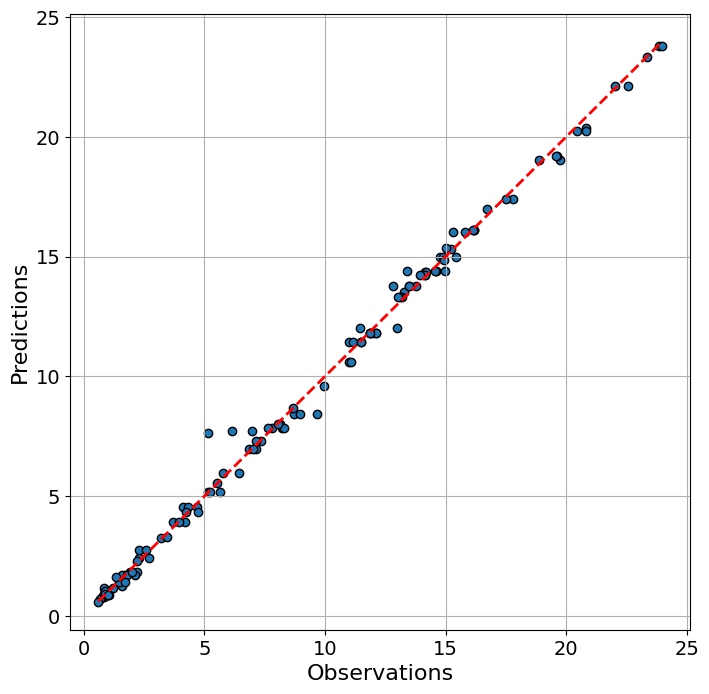

In [68]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Observations', fontsize=16) 
plt.ylabel('Predictions', fontsize=16) 
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)